# Graded Challenge 1: Pokemon Type Dataset Analysis

Judan Syamsul Hadad (GitHub: Riezn) / FTDS009

## Description

### Objective

Selamat datang. Notebook ini dibuat sebagai pemenuhan penilaian kompetensi dari rangkaian <u>**Full Time Data Science (FTDS) Bootcamp Batch 9**</u> yang diadakan oleh Hacktiv8 dimana penulis atas nama **Judan Syamsul Hadad** atau dengan handlename **Riezn** merupakan salah satu pesertanya.

Dataset yang diberikan bernama 'Pokemon.csv' dalam extension csv dengan separator berupa koma. Dataset ini terdiri dari 13 kolom berisi # (kemungkinan ID Pokemon), nama Pokemon, tipe Pokemon (2 kolom), Status (Total, HP, Attack, Defense, Sp. Attack, Sp. Def, Speed), generasi Pokemon, dan keterangan *Legendary*. Pada dataset ini terdapat 800 nama Pokemon dari generasi 1 sampai ke generasi 6. Dataset disimpan pada folder yang sama dengan file notebook ini.

Missing value pada dataset ini akan diganti menyesuaikan dengan kolomnya. Data-data lain yang tidak diperlukan akan di-drop dari dataset, sedangkan data-data tambahan yang dibutuhkan akan dibuat berdasarkan informasi yang tersedia dari dataset ini.

Untuk keperluan analisis akan dilakukan querying, grouping, dan plotting dari dataset yang telah diolah.

### Problem Statement

Di dalam notebook ini, penulis akan mengeksplorasi dataset Pokemon dengan tujuan untuk melihat:
1. Apakah ada jenis Pokemon tertentu yang memiliki *total status* yang lebih tinggi dibanding Pokemon lain
2. Bagaimana persebaran jenis Pokemon tersebut antar generasi
3. Bagaimana persebaran *archetype* Pokemon

## Working Area

### Import Module
Library yang digunakan pada notebook ini hanya dua: **NumPy** yang akan disingkat menjadi 'np' dan **pandas** yang akan disingkat menjadi 'pd'

In [667]:
import numpy as np #import library 'numpy' dengan alias 'np'
import pandas as pd #import library 'pandas' dengan alias 'pd'

Import kedua module berhasil dilakukan.

### Data Loading
Berikutnya dataset akan di-load ke dalam dataframe dengan nama *pokemon*.

Tidak butuh parameter tambahan untuk separator dan direktori karena sudah menggunakan separator koma (default untuk csv) dan dataset berada di dalam folder yang sama dengan notebook.

In [668]:
pokemon = pd.read_csv('Pokemon.csv') #load dataset dengan read_csv

Di intro penulis sudah menjelaskan hasil pengecekan dataset jika dibuka dengan program spreadsheet seperti MS Excel. Kita bisa pastikan terlebih dahulu dataset yang kita load apakah sudah sesuai jumlah baris dan kolomnya seperti yang dijabarkan penulis sebelumnya.

In [669]:
pokemon.shape #cek baris dan kolom dataframe

(800, 13)

Jumlah baris dan kolom sesuai dengan penjelasan pada Intro. Selanjutnya kita akan melihat sekilas isi dataset pokemon dari lima baris teratas.

In [670]:
pokemon.head() #cek lima data teratas secara default karena tidak mendefinisikan parameter angka di dalam kurung pada .head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Pada lima baris teratas kita temukan ada **missing value** / **NaN** pada baris ke-4, yaitu 'Charmander' di kolom 'Type 2'. Selain itu pada kolom '#', yang nanti akan di-rename menjadi **PokemonID**, kita temukan bahwa 'Venusaur' dan 'Mega Venusaur' memiliki PokemonID yang sama, tetapi dengan nilai status yang berbeda. Kesimpulan sementara penulis adalah Mega Venusaur merupakan varian dari Venusaur itu sendiri yang lebih *kuat*.

Selanjutnya kita cek lima data terakhir pada dataset pokemon.

In [671]:
pokemon.tail() #cek lima data terbawah secara default karena tidak mendefinisikan parameter angka di dalam kurung pada .head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


Pada lima data terakhir kita lihat bahwa semua Pokemon berstatus *Legendary*.

Langkah berikutnya adalah memastikan tipe data dan jumlah keberadaan missing value berupa 'null' dari jumlah 'non-null' di masing-masing kolom.

In [672]:
pokemon.info() #cek non-null dan tipe data masing-masing kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Dari 13 kolom yang tersedia, hanya kolom 'Type 2' yang memiliki nilai null dan terdapat tiga kolom yang memiliki tipe data 'object' (Name, Type 1, Type 2).

### Data Cleaning

Seperti yang kita ketahui sebelumnya bahwa ada missing values pada kolom 'Type 2' dan kita ingin mengetahui apakah isi kolom 'Type 1' dan 'Type 2' memiliki kesamaan. Jika iya, kita bisa gabungkan keduanya menjadi satu kolom baru untuk memudahkan querying.

In [673]:
type1 = pokemon['Type 1'].sort_values().unique().tolist() #cek value unique pada kolom 'Type 1', sort, dan simpan sebagai list dengan nama 'type1'
print(type1) #cetak type1
len(type1) #cek jumlah unique value dari kolom 'Type 1'


['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']


18

In [674]:
type2 = pokemon['Type 2'].sort_values().unique().tolist() #cek value unique pada kolom 'Type 2', sort, dan simpan sebagai list dengan nama 'type2'
print(type2) #cetak type2
len(type2) #cetak jumlah unique value dari kolom 'Type 2'


['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water', nan]


19

Sekilas kita lihat bahwa perbedaan keduanya hanya pada NaN. Hapus NaN dari list dan cek apakah kedua list tersebut identik atau tidak.

In [675]:
type2 = [x for x in type2 if x is not np.nan] #hapus NaN dari list
print(type2)

['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']


In [676]:
type1 == type2 #operator perbandingan. Jika kedua variabel identik akan mengeluarkan True, tetapi jika tidak identik akan mengeluarkan False

True

Kedua list tersebut identik, maka kolom 'Type 1' dan 'Type 2' bisa kita gabungkan saja untuk memudahkan query.

In [677]:
pokemon['Overall Type'] = pokemon['Type 1'] + ' ' + pokemon['Type 2'] #'Overall Type' akan berisi 'Type 1' dan 'Type 2' dipisahkan oleh spasi

Cek kolom baru dengan nama 'Overall Type'

In [678]:
pokemon.head() #cek lima data teratas 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Overall Type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass Poison
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass Poison
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,NaN


Jika kita lihat hasil penggabungan, terdapat masalah di baris ke-4 'Charmandar' dimana Overall Type menjadi NaN sedangkan tipe pokemon tersebut seharusnya 'Fire' saja. Hal ini disebabkan oleh penggabungan kolom 'Type 1' dengan 'Type 2' yang mengandung NaN. Missing value tersebut harus kita ganti dengan empty string agar kolom Overall Type tidak menghasilkan NaN.

In [679]:
pokemon['Type 2'].fillna('',inplace=True) #isi missing value dengan string kosong

In [680]:
pokemon.head() #cek ulang lima data teratas

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Overall Type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass Poison
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass Poison
4,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False,NaN


Pada baris ke-4 'Charmandar' kolom 'Type 2' sudah berhasil kita ubah menjadi string kosong, tetapi kolom 'Overall Type' masih mengandung NaN. Kita perlu memanggil ulang penjumlahan kolom seperti sebelumnya untuk update kolom 'Overall Type'.

In [681]:
pokemon['Overall Type'] = pokemon['Type 1'] + ' ' + pokemon['Type 2'] #update kolom 'Overall Type'

In [682]:
pokemon.head() #cek ulang lima data teratas

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Overall Type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass Poison
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass Poison
4,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False,Fire


'Overall Type' sudah berhasil kita update. Selanjutnya kita akan menghapus kolom 'Type 1' dan 'Type 2' karena *redundant*.

In [683]:
pokemon.drop(columns=['Type 1', 'Type 2'], inplace=True) #hapus kolom 'Type 1' dan 'Type 2'

In [684]:
pokemon.head() #cek ulang lima data teratas

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Overall Type
0,1,Bulbasaur,318,45,49,49,65,65,45,1,False,Grass Poison
1,2,Ivysaur,405,60,62,63,80,80,60,1,False,Grass Poison
2,3,Venusaur,525,80,82,83,100,100,80,1,False,Grass Poison
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,False,Grass Poison
4,4,Charmander,309,39,52,43,60,50,65,1,False,Fire


Kolom 'Type 1' dan 'Type 2' sudah berhasil dihapus. Selanjutnya kita akan mengubah nama kolom # menjadi PokemonID

In [685]:
pokemon.rename(columns={'#':'PokemonID'},inplace=True) #ubah nama kolom '#' menjadi 'PokemonID'

In [686]:
pokemon.head() #cek ulang lima data teratas

,PokemonID,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Overall Type
0,1,Bulbasaur,318,45,49,49,65,65,45,1,False,Grass Poison
1,2,Ivysaur,405,60,62,63,80,80,60,1,False,Grass Poison
2,3,Venusaur,525,80,82,83,100,100,80,1,False,Grass Poison
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,False,Grass Poison
4,4,Charmander,309,39,52,43,60,50,65,1,False,Fire


Nama kolom telah berhasil diubah menjadi PokemonID.

Sebelum melanjutkan ke eksplorasi kita review tujuan dari notebook ini:
1. Apakah ada jenis Pokemon tertentu yang memiliki *total status* yang lebih tinggi dibanding Pokemon lain
2. Bagaimana persebaran jenis Pokemon tersebut antar generasi
3. Bagaimana persebaran *archetype* Pokemon

Kita bisa sederhanakan dataframe dengan data yang akan kita pakai saja. Hapus kolom 'HP', 'Attack', 'Defense', 'Sp. Atk', ' Sp. Def', dan 'Speed' karena tidak digunakan pada analisis ini.

Sekarang kita bisa hapus kolom lain yang tidak diperlukan.

In [687]:
pokemon.drop(columns=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],inplace=True) #hapus kolom 'HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'

In [688]:
pokemon.head() #cek ulang lima data teratas

,PokemonID,Name,Total,Generation,Legendary,Overall Type
0,1,Bulbasaur,318,1,False,Grass Poison
1,2,Ivysaur,405,1,False,Grass Poison
2,3,Venusaur,525,1,False,Grass Poison
3,3,VenusaurMega Venusaur,625,1,False,Grass Poison
4,4,Charmander,309,1,False,Fire


Data yang dibutuhkan untuk analisis sudah siap. Kita akan melanjutkan ke Eksplorasi Data.

### Data Exploration
Bab ini akan kita bagi menjadi tiga subbab sesuai dengan tujuan dari notebook ini.

#### 1. Tipe Pokemon dengan *total status* yang lebih tinggi
Sebelumnya kita sudah mengetahui saat pengecekan awal di Data Cleaning bahwa varian 'Mega' memiliki status lebih tinggi dibandingkan varian biasanya. Sekarang kita akan lihat kumpulan varian 'Mega tersebut'

In [689]:
pokemon[
    (pokemon['Name'].str.contains('Mega'))
] #query untuk string 'Mega' pada kolom 'Name'

,PokemonID,Name,Total,Generation,Legendary,Overall Type
3,3,VenusaurMega Venusaur,625,1,False,Grass Poison
7,6,CharizardMega Charizard X,634,1,False,Fire Dragon
8,6,CharizardMega Charizard Y,634,1,False,Fire Flying
12,9,BlastoiseMega Blastoise,630,1,False,Water
19,15,BeedrillMega Beedrill,495,1,False,Bug Poison
23,18,PidgeotMega Pidgeot,579,1,False,Normal Flying
71,65,AlakazamMega Alakazam,590,1,False,Psychic
87,80,SlowbroMega Slowbro,590,1,False,Water Psychic
102,94,GengarMega Gengar,600,1,False,Ghost Poison
124,115,KangaskhanMega Kangaskhan,590,1,False,Normal


Jika kita lihat, ada beberapa varian 'Mega' yang juga memiliki keterangan 'Legendary'. Sekarang coba kita bandingkan 'Total' dari varian 'Mega' saja, 'Legendary' saja, dan 'Mega Legendary'

In [690]:
Mega = pokemon[
    (pokemon['Name'].str.contains('Mega')) & #query untuk substring 'Mega' pada kolom 'Name' DAN
    (pokemon['Legendary']==0) #bukan Legendary
]
Mega

,PokemonID,Name,Total,Generation,Legendary,Overall Type
3,3,VenusaurMega Venusaur,625,1,False,Grass Poison
7,6,CharizardMega Charizard X,634,1,False,Fire Dragon
8,6,CharizardMega Charizard Y,634,1,False,Fire Flying
12,9,BlastoiseMega Blastoise,630,1,False,Water
19,15,BeedrillMega Beedrill,495,1,False,Bug Poison
23,18,PidgeotMega Pidgeot,579,1,False,Normal Flying
71,65,AlakazamMega Alakazam,590,1,False,Psychic
87,80,SlowbroMega Slowbro,590,1,False,Water Psychic
102,94,GengarMega Gengar,600,1,False,Ghost Poison
124,115,KangaskhanMega Kangaskhan,590,1,False,Normal


In [691]:
MegaStats = Mega['Total'].agg({'min','max','mean','count'}).astype(int) #aggregate kolom 'Total' dan menunjukkan nilai min, max, dan mean sebagai integer
MegaStats.rename('Mega',inplace=True) #rename series menjadi 'Mega'

count     43
max      700
mean     598
min      480
Name: Mega, dtype: int32

Varian 'Mega' memiliki nilai Total min 480, max 700, dan mean 598. Jumlah varian ini sebanyak 43.

In [692]:
Legendary = pokemon[
    (~pokemon['Name'].str.contains('Mega')) & #query untuk substring yang tidak mengandung 'Mega' pada kolom 'Name' DAN
    (pokemon['Legendary']==1) #merupakan Legendary
]
Legendary

,PokemonID,Name,Total,Generation,Legendary,Overall Type
156,144,Articuno,580,1,True,Ice Flying
157,145,Zapdos,580,1,True,Electric Flying
158,146,Moltres,580,1,True,Fire Flying
162,150,Mewtwo,680,1,True,Psychic
262,243,Raikou,580,2,True,Electric
263,244,Entei,580,2,True,Fire
264,245,Suicune,580,2,True,Water
269,249,Lugia,680,2,True,Psychic Flying
270,250,Ho-oh,680,2,True,Fire Flying
414,377,Regirock,580,3,True,Rock


In [693]:
LegStats = Legendary['Total'].agg({'min','max','mean','count'}).astype(int) #aggregate kolom 'Total' dan menunjukkan nilai min, max, dan mean sebagai integer
LegStats.rename('Legendary',inplace=True) #rename series menjadi 'Legendary'

count     59
max      770
mean     626
min      580
Name: Legendary, dtype: int32

Varian 'Legendary' memiliki nilai Total min 580, max 770, dan mean 626. Jumlah varian ini sebanyak 59, sedikit lebih banyak dibanding varian 'Mega'. Sejauh ini kita bisa lihat bahwa 'Legendary' memiliki status lebih tinggi dari 'Mega'. Sekarang kita lihat Pokemon yang memiliki dua status tersebut.

In [694]:
MegaLeg = pokemon[
    (pokemon['Name'].str.contains('Mega')) & #query untuk substring yang mengandung 'Mega' pada kolom 'Name' DAN
    (pokemon['Legendary']==1) #merupakan Legendary
]
MegaLeg

,PokemonID,Name,Total,Generation,Legendary,Overall Type
163,150,MewtwoMega Mewtwo X,780,1,True,Psychic Fighting
164,150,MewtwoMega Mewtwo Y,780,1,True,Psychic
418,380,LatiasMega Latias,700,3,True,Dragon Psychic
420,381,LatiosMega Latios,700,3,True,Dragon Psychic
426,384,RayquazaMega Rayquaza,780,3,True,Dragon Flying
796,719,DiancieMega Diancie,700,6,True,Rock Fairy


In [695]:
MegaLegStats = MegaLeg['Total'].agg({'min','max','mean','count'}).astype(int) #aggregate kolom 'Total' dan menunjukkan nilai min, max, dan mean sebagai integer
MegaLegStats.rename('Mega Legendary',inplace=True) #rename series menjadi 'Mega Legendary'

count      6
max      780
mean     740
min      700
Name: Mega Legendary, dtype: int32

Varian 'Mega Legendary' memiliki nilai Total min 700, max 780, dan mean 740. Jenis ini merupakan jenis Pokemon dengan rentang Total status terendah, berarti tiap Pokemon kategori ini tidak jauh beda kekuatannya. Di sisi lain, jumlah Pokemon dengan status 'Mega Legendary' juga jauh lebih sedikit dibanding 'Mega' saja atau 'Legendary' saja. perbandingannya bisa dilihat ditabel berikut:

In [696]:
StatComp = pd.concat([MegaStats,LegStats,MegaLegStats],axis=1).T #gabung series dengan concat lalu pada axis=1 lalu transpose
StatComp

,count,max,mean,min
Mega,43,700,598,480
Legendary,59,770,626,580
Mega Legendary,6,780,740,700


Jika diurutkan berdasarkan total status maka 'Mega Legendary' > 'Legendary' > 'Mega'. Bagaimana dengan Pokemon yang bukan ketiganya?

In [697]:
Normal = pokemon[
    (~pokemon['Name'].str.contains('Mega')) & #query untuk substring yang tidak mengandung 'Mega' pada kolom 'Name' DAN
    (pokemon['Legendary']==0) #bukan merupakan Legendary
]
Normal

,PokemonID,Name,Total,Generation,Legendary,Overall Type
0,1,Bulbasaur,318,1,False,Grass Poison
1,2,Ivysaur,405,1,False,Grass Poison
2,3,Venusaur,525,1,False,Grass Poison
4,4,Charmander,309,1,False,Fire
5,5,Charmeleon,405,1,False,Fire
...,...,...,...,...,...,...
787,711,GourgeistSuper Size,494,6,False,Ghost Grass
788,712,Bergmite,304,6,False,Ice
789,713,Avalugg,514,6,False,Ice
790,714,Noibat,245,6,False,Flying Dragon


In [698]:
NormalStats = Normal['Total'].agg({'min','max','mean','count'}).astype(int) #aggregate kolom 'Total' dan menunjukkan nilai min, max, dan mean sebagai integer
NormalStats.rename('Normal',inplace=True) #rename series menjadi 'Normal'

count    692
max      670
mean     405
min      180
Name: Normal, dtype: int32

Varian 'Normal' memiliki nilai Total min 180, max 670, dan mean 670. Jenis ini merupakan jenis Pokemon dengan rentang Total status tertinggi dari yang terlemah hingga terkuat. Hal ini juga disebabkan oleh banyaknya Pokemon yang masuk dalam kategori ini. Perbandingannya dapat dilihat di tabel berikut:

In [699]:
StatComp = pd.concat([StatComp.T,(NormalStats)],axis=1).T #transpose StatComp agar sama dengan NormalStats, kemudian digabung dengan concat lalu di-transpose ulang
StatComp

,count,max,mean,min
Mega,43,700,598,480
Legendary,59,770,626,580
Mega Legendary,6,780,740,700
Normal,692,670,405,180


#### 2. Persebaran jenis Pokemon antar generasi

Sekarang kita coba lihat persebaran tiga jenis Pokemon selain Normal berdasarkan generasi dimulai dari 'Mega'.

In [700]:
Gen_Mega = Mega.groupby(['Generation'])['Name'].count().astype(int).rename('Mega',inplace=True).T #grouping 'Mega' berdasarkan generasi dan hitung jumlah Pokemon, setelah itu transpose
Gen_Mega

Generation
1    13
2     7
3    17
4     5
5     1
Name: Mega, dtype: int32

In [701]:
Gen_Leg = Legendary.groupby(['Generation'])['Name'].count().astype(int).rename('Legendary',inplace=True).T #grouping 'Legendary' berdasarkan generasi dan hitung jumlah Pokemon, setelah itu transpose
Gen_Leg

Generation
1     4
2     5
3    15
4    13
5    15
6     7
Name: Legendary, dtype: int32

In [702]:
Gen_MegaLeg = MegaLeg.groupby(['Generation'])['Name'].count().astype(int).rename('Mega Legendary',inplace=True).T #grouping 'Mega Legendary' berdasarkan generasi dan hitung jumlah Pokemon, setelah itu transpose
Gen_MegaLeg

Generation
1    2
3    3
6    1
Name: Mega Legendary, dtype: int32

Group masing-masing jenis akan digabungkan ke dalam satu tabel Gen

In [703]:
Gen = pd.concat([Gen_Mega,Gen_Leg,Gen_MegaLeg],axis=1) #gabung series 'Mega', 'Legendary', dan 'Mega Legendary' menggunakan concat pada axis=1
Gen

,Mega,Legendary,Mega Legendary
Generation,,,
1,13.0,4,2.0
2,7.0,5,NaN
3,17.0,15,3.0
4,5.0,13,NaN
5,1.0,15,NaN
6,NaN,7,1.0


Agar lebih mudah melihat gambaran distribusinya, lihat bar plot di bawah:

<AxesSubplot:title={'center':'Distribusi Pokemon Antar Generasi'}, xlabel='Generation', ylabel='Jumlah Pokemon'>

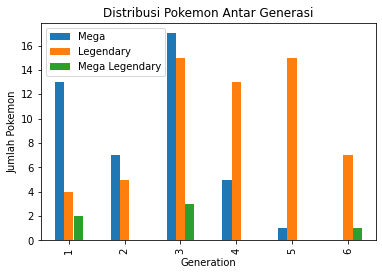

In [704]:
Gen.plot(kind='bar',ylabel='Jumlah Pokemon',title='Distribusi Pokemon Antar Generasi') #plot dari tabel Gen dengan tipe barplot, legend yang ditampilkan, judul, dan label sumbu

Distribusinya terlihat cukup acak. Sekarang coba kita lihat total ketiganya.

In [705]:
Gen.fillna(0,inplace=True) #replace missing value dengan 0

In [706]:
Gen['Total'] = Gen['Mega'] + Gen['Legendary'] + Gen['Mega Legendary'] #kolom baru 'Total' dari hasil penjumlahan tiga kolom lainnya
Gen['Total'].astype(int) #konversi ke tipe int

Generation
1    19
2    12
3    35
4    18
5    16
6     8
Name: Total, dtype: int32

<AxesSubplot:title={'center':'Distribusi Pokemon Antar Generasi'}, xlabel='Generation', ylabel='Jumlah Pokemon'>

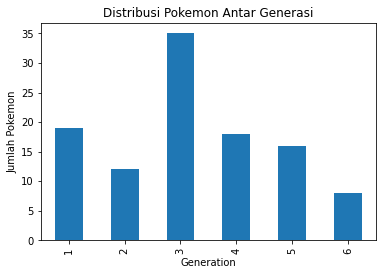

In [707]:
Gen['Total'].plot(kind='bar',ylabel='Jumlah Pokemon',title='Distribusi Pokemon Antar Generasi') #plot dari tabel Gen dengan tipe barplot, legend yang ditampilkan, judul, dan label sumbu

In [708]:
Gen.astype(int) #mengubah float/desimal ke integer

,Mega,Legendary,Mega Legendary,Total
Generation,,,,
1,13,4,2,19
2,7,5,0,12
3,17,15,3,35
4,5,13,0,18
5,1,15,0,16
6,0,7,1,8


Terlihat bahwa tiga jenis Pokemon ini terkonsentrasi lebih banyak di generasi ketiga baik 'Mega', 'Legendary', ataupun 'Mega Legendary'

#### 3. Persebaran *archetype* Pokemon

Sebelumnya kita sudah mengelompokkan Pokemon berdasarkan jenisnya, selanjutnya kita akan mengelompokkannya berdasarkan kombinasi tipenya.

In [709]:
pokemon.groupby(['Overall Type'])['Name'].count() #grouping berdasarkan 'Overall Type' dan menghitung jumlah masing-masing kombinasi tipe

Overall Type
Bug              17
Bug Electric      2
Bug Fighting      2
Bug Fire          2
Bug Flying       14
                 ..
Water Ice         3
Water Poison      3
Water Psychic     5
Water Rock        4
Water Steel       1
Name: Name, Length: 154, dtype: int64

Secara keseluruhan terdapat 154 kombinasi tipe Pokemon dengan beberapa kombinasi tersebut terdiri dari duplikat tipe semisal 'Bug Electric' yang terdiri dari tipe 'Bug' dan tipe 'Electric'.

Sekarang kita coba hitung *archetype*-nya saja, yaitu 18 tipe utama yang telah dideklarasikan dalam variabel type1 ataupun type2.

In [710]:
type1 #list *archetype* Pokemon

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

Hitung jumlah masing-masing *archetype*. Perlu dicatat bahwa akan ada Pokemon yang terhitung di dua *archetype* berbeda.

In [711]:
archetype_count = [] #list untuk menyimpan jumlah Pokemon di masing-masing archetype
for archetype in type1: #loop untuk query setiap *archetype*
    type_count = pokemon[
        (pokemon['Overall Type'].str.contains(archetype)) #query berdasarkan archetype
    ].groupby(['Overall Type'])['Name'].count().sum() #grouping berdasarkan 'Overall Type' dan menghitung jumlah untuk archetype yang sama
    print(archetype, type_count) #cetak archetype dan jumlahnya
    archetype_count.append(type_count) #menyimpan jumlah archetype dari masing-masing loop ke list 'archetype_count'

archetype = pd.DataFrame({ #buat dataframe archetype
    'Type':type1, #kolom pertama adalah 'Type' dengan isi kolom berupa archetype
    '# of Pokemon':archetype_count #kolom kedua adalah '# of Pokemon' dengan isi kolom berupa jumlah Pokemon di archetype tersebut
}) 

Bug 72
Dark 51
Dragon 50
Electric 50
Fairy 40
Fighting 53
Fire 64
Flying 101
Ghost 46
Grass 95
Ground 67
Ice 38
Normal 102
Poison 62
Psychic 90
Rock 58
Steel 49
Water 126


In [712]:
archetype

,Type,# of Pokemon
0,Bug,72
1,Dark,51
2,Dragon,50
3,Electric,50
4,Fairy,40
5,Fighting,53
6,Fire,64
7,Flying,101
8,Ghost,46
9,Grass,95


Cek dengan statistik sederhana.

In [713]:
archetype_stat = archetype['# of Pokemon'].agg(['mean','min','max','median']).rename('Statistik Archetype').astype(int) #cek mean, median, min, max dari archetype
archetype_stat

mean       67
min        38
max       126
median     60
Name: Statistik Archetype, dtype: int32

Dari data statistik tersebut, kita cek *archetype* apa yang memiliki jumlah paling banyak dan sedikit.

In [714]:
archetype[
    (archetype['# of Pokemon']==126) #query archetype dengan jumlah Pokemon sebanyak 126
]

,Type,# of Pokemon
17,Water,126


In [715]:
archetype[
    (archetype['# of Pokemon']==38) #query archetype dengan jumlah Pokemon sebanyak 38
]

,Type,# of Pokemon
11,Ice,38


Dari uji statistik di atas kita mengetahui bahwa Pokemon tipe Ice paling sedikit sebanyak 38 dan tipe Water paling banyak sebanyak 126. Nilai mean dan median masih cukup dekat yaitu 67 untuk mean dan 60 untuk median.

Agar memudahkan visualisasi, kita ubah tabel 'archetype' ke dalam plot.

<AxesSubplot:title={'center':'Distribusi Pokemon Berdasarkan Archetype'}, xlabel='Archetype', ylabel='# of Pokemon'>

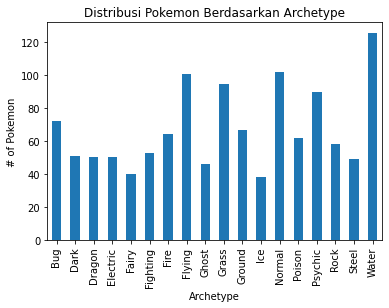

In [716]:
arche_plot = archetype.plot(x='Type',kind='bar',xlabel='Archetype',ylabel='# of Pokemon',title='Distribusi Pokemon Berdasarkan Archetype',legend=False)
arche_plot

## Conclusions, Assumptions, Overall Analysis

Berdasarkan analisis yang telah dilakukan dari dataset Pokemon yang diberikan, berikut kesimpulan yang ditarik oleh penulis:

1. Pokemon jenis 'Mega Legendary' secara umum memiliki total status tertinggi diikuti Legendary, Mega, lalu Normal. Di sisi lain, Pokemon 'Mega Legendary' jumlahnya sangat sedikit jika dibandingkan Pokemon Normal yang merupakan data mayoritas pada dataset ini.

In [717]:
StatComp

,count,max,mean,min
Mega,43,700,598,480
Legendary,59,770,626,580
Mega Legendary,6,780,740,700
Normal,692,670,405,180


2. Pokemon 'Legendary' tersebar di seluruh generasi. Pokemon 'Mega' tidak ada di generasi keenam, sedangkan Pokemon 'Mega Legendary' hanya ada di generasi pertama, ketiga, dan keenam. Tiga jenis Pokemon ini paling banyak terdapat di generasi ketiga.

In [718]:
Gen.astype(int)

,Mega,Legendary,Mega Legendary,Total
Generation,,,,
1,13,4,2,19
2,7,5,0,12
3,17,15,3,35
4,5,13,0,18
5,1,15,0,16
6,0,7,1,8


3. Pokemon memiliki 18 *archetype* atau tipe utama dengan tipe terbanyak adalah 'Water' sebanyak 126 Pokemon dan tipe paling sedikit adalah 'Ice' sebanyak 38 Pokemon.

In [719]:
archetype

,Type,# of Pokemon
0,Bug,72
1,Dark,51
2,Dragon,50
3,Electric,50
4,Fairy,40
5,Fighting,53
6,Fire,64
7,Flying,101
8,Ghost,46
9,Grass,95


In [720]:
archetype_stat

mean       67
min        38
max       126
median     60
Name: Statistik Archetype, dtype: int32